<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/feature_selection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv('/content/train.csv').drop(columns='subject')

In [29]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [30]:
df['Activity'].value_counts()

,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = df.drop('Activity',axis = 1)
y = df['Activity']

le = LabelEncoder()
y = le.fit_transform(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 32 )



In [32]:
x_train.shape

(5881, 561)

In [33]:
y_train.shape

(5881,)

In [34]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.9830047586675731

In [38]:
def get_duplicate_columns(df):
  duplicate_columns = {}
  seen_columns = {}

  for column in df.columns:
    current_column = df[column]

    try:
      current_column_hash = current_column.value.tobytes()
    except AttributeError:
      current_column_hash = current_column.to_string().encode()

    if current_column_hash in seen_columns:
      if seen_columns[current_column_hash] in duplicate_columns:
        duplicate_columns[seen_columns[current_column_hash]].append(column)
      else:
        duplicate_columns[seen_columns[current_column_hash]] = [column]
    else:
      seen_columns[current_column_hash] = column
  return duplicate_columns

In [41]:
duplicate_columns = get_duplicate_columns(x_train)

In [42]:
x_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
4902,-0.976155,-0.976155,-0.976155,-0.976155
6716,-0.996686,-0.996686,-0.996686,-0.996686
1622,-0.259906,-0.259906,-0.259906,-0.259906
3147,-0.963809,-0.963809,-0.963809,-0.963809
3944,0.054104,0.054104,0.054104,0.054104
...,...,...,...,...
4030,-0.993733,-0.993733,-0.993733,-0.993733
2940,-0.985049,-0.985049,-0.985049,-0.985049
1334,-0.976082,-0.976082,-0.976082,-0.976082
1579,0.091450,0.091450,0.091450,0.091450


In [44]:
for one_list in duplicate_columns.values():
    x_train.drop(columns=one_list,inplace=True)
    x_test.drop(columns=one_list,inplace=True)

In [45]:
x_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
4902,0.287463,-0.013371,-0.094658,-0.988749,-0.973641,-0.960506,-0.988652,-0.971500,-0.955635,-0.931286,...,0.354810,-0.398860,-0.647534,0.034468,-0.057827,0.072523,-0.704823,-0.559580,0.207879,0.311366
6716,0.279127,-0.016855,-0.110319,-0.992278,-0.993533,-0.997749,-0.992989,-0.993194,-0.997848,-0.932813,...,0.519978,-0.765469,-0.960094,0.199480,0.022475,0.086501,-0.319817,0.468829,-0.564489,-0.428764
1622,0.284636,-0.037816,-0.170779,-0.328458,-0.411306,-0.184913,-0.367299,-0.430593,-0.206138,-0.247617,...,0.024242,-0.420985,-0.765149,-0.309834,0.835058,0.954158,-0.858955,-0.553588,0.293673,0.259648
3147,0.291918,-0.020919,-0.112665,-0.960373,-0.961296,-0.983819,-0.959863,-0.956413,-0.981146,-0.904303,...,0.348238,-0.734591,-0.942012,0.035526,0.163166,-0.195659,0.151144,0.518252,0.422956,-0.782610
3944,0.280843,-0.054692,-0.055593,-0.092348,0.108249,-0.035080,-0.151513,0.125032,-0.098872,0.140342,...,0.099124,-0.437667,-0.761503,-0.047359,-0.650152,-0.738860,-0.523490,-0.577064,0.318585,0.210900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.275488,-0.014069,-0.115585,-0.995568,-0.986976,-0.993476,-0.996600,-0.987016,-0.993328,-0.933621,...,0.057083,-0.420867,-0.767997,-0.024524,0.324484,0.307202,0.177998,-0.753780,0.107072,0.196253
2940,0.277162,-0.011692,-0.113750,-0.987043,-0.980105,-0.984288,-0.987801,-0.978385,-0.984186,-0.931161,...,0.051015,-0.105963,-0.549400,0.065896,-0.185336,-0.107453,0.022515,0.303857,-0.220559,-0.729351
1334,0.270514,-0.019739,-0.129706,-0.988424,-0.980260,-0.968742,-0.989403,-0.978525,-0.967611,-0.933788,...,0.342991,-0.547240,-0.800976,0.001274,-0.359362,0.041658,-0.338905,-0.791197,0.139212,0.162886
1579,0.127938,-0.023825,-0.099492,0.141873,-0.008185,-0.243573,0.051355,-0.097595,-0.306885,0.316041,...,0.000685,-0.579174,-0.873940,0.846190,-0.654844,0.789931,-0.610322,-0.875557,0.183465,0.005903


In [46]:
# variance threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=.05)

In [47]:
sel.fit(x_train)

VarianceThreshold(threshold=0.05)

In [49]:
sum(sel.get_support())

np.int64(349)

In [54]:
columns = x_train.columns[sel.get_support()]

In [56]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [57]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

x_train = pd.DataFrame(x_train, columns=columns)
x_test = pd.DataFrame(x_test, columns=columns)

In [59]:
import seaborn as sns

<Axes: >

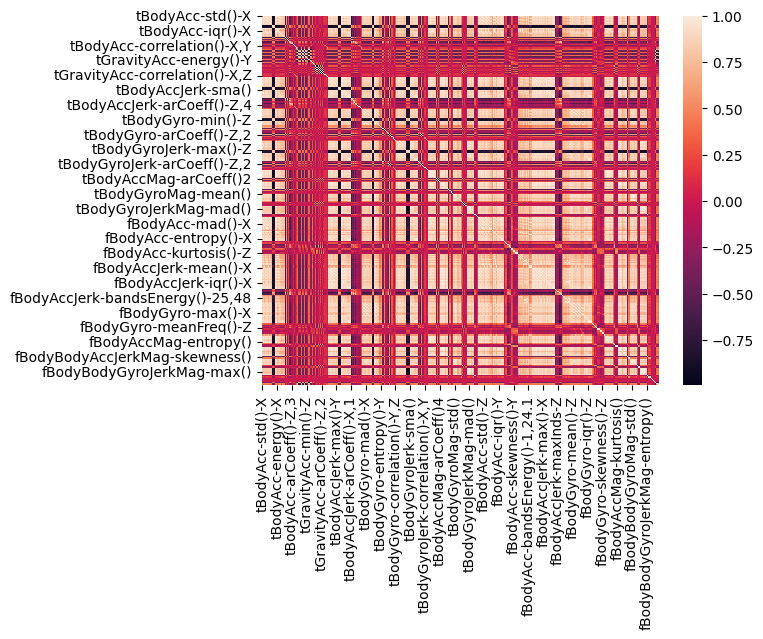

In [60]:
sns.heatmap(x_train.corr())